In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#Q1(a)
# reading csv file
df = pd.read_csv("/content/diabetes.csv", encoding = "windows-1252")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:


Nullvalue = df.isnull()
#fillzero = df.fillna(0)

In [ ]:



Nullvalue.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [ ]:
from sklearn.impute import SimpleImputer
ndf = SimpleImputer(strategy='mean')
ndf

SimpleImputer()

In [ ]:
meanvalues = ndf.fit_transform(df)

In [ ]:
newdf = pd.DataFrame(meanvalues,columns= df.columns)
newdf

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1.0


In [ ]:
newdf.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [ ]:
x = df.iloc[:,:7]
y = df.iloc[:,7]

In [ ]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,6,148,72,35,0,33.6,0.627
1,1,85,66,29,0,26.6,0.351
2,8,183,64,0,0,23.3,0.672
3,1,89,66,23,94,28.1,0.167
4,0,137,40,35,168,43.1,2.288


In [ ]:
y.head()

0    50
1    31
2    32
3    21
4    33
Name: Age, dtype: int64

In [ ]:

X= np.array(x).reshape
minmax = MinMaxScaler()
minmaxMpg = minmax.fit_transform(x)
X

<function ndarray.reshape>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=5)


In [ ]:
X_train.shape

(614, 7)

In [ ]:
y_train.shape

(614,)

In [ ]:
y_train


140    55
358    48
143    42
674    68
121    24
       ..
73     23
400    31
118    22
701    49
206    57
Name: Age, Length: 614, dtype: int64

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)
print("Performance on Test Set -->")
print('RMSE is ', rmse)
print('R2 score is ', r2)

Performance on Test Set -->
RMSE is  9.05944865162532
R2 score is  0.33416762930445354


In [ ]:
#Q1(b)
# taken from train test split mathod
X_train.shape

(614, 7)

In [ ]:
y_train.shape

(614,)

In [ ]:
y_test.shape

(154,)

In [ ]:
X_test.shape

(154, 7)

In [ ]:
X_train = np.vstack((np.ones((X_train.shape[0], )), X_train.T)).T # converting the data into array form

X_test = np.vstack((np.ones((X_test.shape[0], )), X_test.T)).T

In [ ]:
X_train

array([[1.00e+00, 3.00e+00, 1.28e+02, ..., 0.00e+00, 2.11e+01, 2.68e-01],
       [1.00e+00, 1.20e+01, 8.80e+01, ..., 5.40e+01, 3.53e+01, 3.78e-01],
       [1.00e+00, 1.00e+01, 1.08e+02, ..., 0.00e+00, 3.24e+01, 2.72e-01],
       ...,
       [1.00e+00, 4.00e+00, 9.70e+01, ..., 0.00e+00, 2.82e+01, 4.43e-01],
       [1.00e+00, 6.00e+00, 1.25e+02, ..., 0.00e+00, 2.76e+01, 5.65e-01],
       [1.00e+00, 8.00e+00, 1.96e+02, ..., 2.80e+02, 3.75e+01, 6.05e-01]])

In [ ]:
y_train

140    55
358    48
143    42
674    68
121    24
       ..
73     23
400    31
118    22
701    49
206    57
Name: Age, Length: 614, dtype: int64

In [ ]:
# liner regaretion by scartch
def model(X, Y, learning_rate, iteration):
    m = Y.size
    omega = np.zeros((X.shape[1], 1))
    cost_list = []
    for i in range(iteration):
        y_pred = np.dot(X, omega)
        cost = (1/(2*m))*np.sum(np.square(y_pred - Y))
        d_omega = (1/m)*np.dot(X.T, y_pred - Y)
        omega = omega - learning_rate*d_omega
        cost_list.append(cost)
        if(i%(iteration/10) == 0):
            print("Cost is :", cost)

    return omega, cost_list

In [ ]:

X_test

array([[142],
       [165],
       [110],
       [183],
       [ 93],
       [114],
       [167],
       [109],
       [ 74],
       [154],
       [ 78],
       [ 71],
       [165],
       [113],
       [132],
       [142],
       [108],
       [151],
       [100],
       [ 90],
       [ 93],
       [116],
       [ 99],
       [130],
       [ 74],
       [138],
       [ 87],
       [ 87],
       [102],
       [123],
       [ 71],
       [109],
       [123],
       [ 84],
       [158],
       [106],
       [103],
       [151],
       [114],
       [109],
       [118],
       [131],
       [187],
       [129],
       [ 85],
       [148],
       [ 99],
       [137],
       [190],
       [187],
       [ 90],
       [181],
       [136],
       [103],
       [146],
       [174],
       [109],
       [ 81],
       [125],
       [151],
       [143],
       [139],
       [ 97],
       [134],
       [101],
       [179],
       [120],
       [111],
       [194],
       [ 79],
       [138],
      

In [ ]:
iteration = 1000000
learning_rate = 0.00005
omega, cost_list = model(X_train, y_train, learning_rate = learning_rate, iteration =
iteration)

Cost is : 610.7413194444445
Cost is : 78.4362253535869
Cost is : 78.4362253535869
Cost is : 78.4362253535869
Cost is : 78.4362253535869
Cost is : 78.4362253535869
Cost is : 78.4362253535869
Cost is : 78.4362253535869
Cost is : 78.4362253535869
Cost is : 78.4362253535869


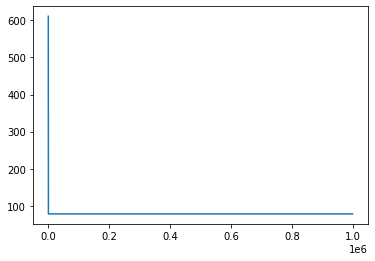

In [ ]:
rng = np.arange(0, iteration)
plt.plot(rng, cost_list)
plt.show()
# this id the lerning graph

In [ ]:
y_pred = np.dot(X_test, omega)
error = (1/X_test.shape[0])*np.sum(np.abs(y_pred - y_test))

In [ ]:
print("Test error is :", error*100, "%")
print("Test Accuracy is :", (1- error)*100, "%")

Test error is : 965.7706117282254 %
Test Accuracy is : -865.7706117282254 %


In [ ]:
#Q2(a)
# first is StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = df.iloc[:,:7]
scaler.fit(X)
standerdscaled = scaler.transform(X)
rms1 = (np.sqrt(mean_squared_error(y_test, y_pred)))

#MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
minmax.fit(X)
minmaxscaled = minmax.transform(X)
rms2 = (np.sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
rms1

12.828337961285163

In [ ]:
rms2

12.828337961285163

In [ ]:
standerdscaled

array([[ 0.63994726,  0.84832379,  0.14964075, ..., -0.69289057,
         0.20401277,  0.46849198],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.69289057,
        -0.68442195, -0.36506078],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -0.69289057,
        -1.10325546,  0.60439732],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ...,  0.27959377,
        -0.73518964, -0.68519336],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.69289057,
        -0.24020459, -0.37110101],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.69289057,
        -0.20212881, -0.47378505]])

In [ ]:
minmaxscaled

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.        , 0.50074516,
        0.23441503],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.        , 0.39642325,
        0.11656704],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.        , 0.34724292,
        0.25362938],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.13238771, 0.390462  ,
        0.07130658],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.        , 0.4485842 ,
        0.11571307],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.        , 0.45305514,
        0.10119556]])

In [ ]:
# first ratio
from sklearn.metrics import mean_squared_error
import numpy as np
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2021)
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(x_train,y_train)
y_pred=ml.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
rmse1=np.sqrt(mse)
print(rmse1)

8.608454057757594


In [ ]:
# seconed ratio
from sklearn.metrics import mean_squared_error
import numpy as np
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2021)
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(x_train,y_train)
y_pred=ml.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
rmse2=np.sqrt(mse)
print(rmse2)

8.483253410438396


In [ ]:
# third ratio
from sklearn.metrics import mean_squared_error
import numpy as np
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=2021)
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(x_train,y_train)
y_pred=ml.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
rmse3=np.sqrt(mse)
print(rmse3)

8.703292222375127


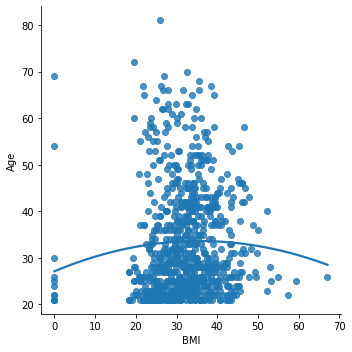

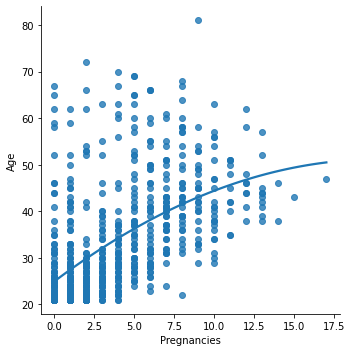

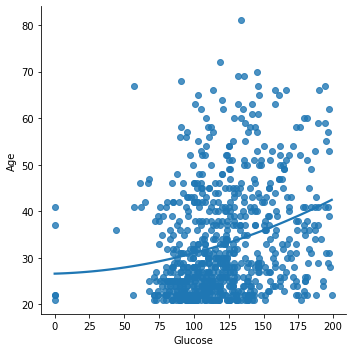

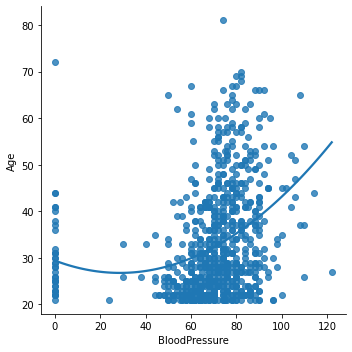

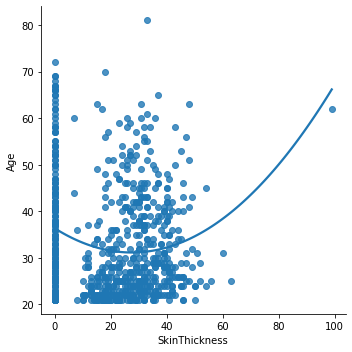

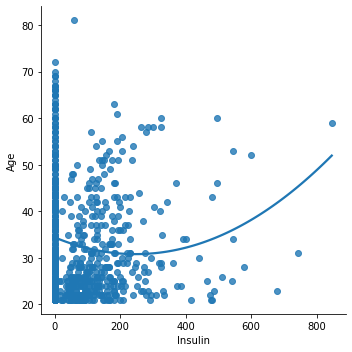

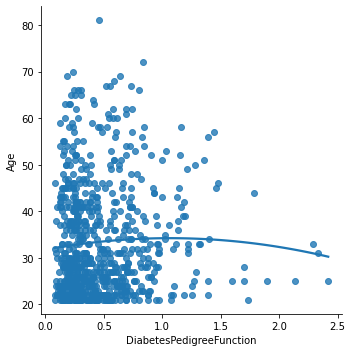

In [ ]:
sns.lmplot(x ="BMI", y ="Age", data = df, order = 1, ci = None)
sns.lmplot(x ="Pregnancies", y ="Age", data = df, order = 1, ci = None)
sns.lmplot(x ="Glucose", y ="Age", data = df, order = 1, ci = None)
sns.lmplot(x ="BloodPressure", y ="Age", data = df, order = 1, ci = None)
sns.lmplot(x ="SkinThickness", y ="Age", data = df, order = 1, ci = None)
sns.lmplot(x ="Insulin", y ="Age", data = df, order = 1, ci = None)
sns.lmplot(x ="DiabetesPedigreeFunction", y ="Age", data = df, order = 1, ci = None)
# these are the graph age as the target variable and other data column as the feature
# i got the the plot

In [ ]:
df.fillna(method ='ffill', inplace = True)
X = np.array(df['Pregnancies']).reshape(-1, 1)
y = np.array(df['Age']).reshape(-1, 1)
df.dropna(inplace = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
plt.show()

In [ ]:

sns.lmplot(x ="Glucose", y ="Age", data = df, order = 1, ci = None)

In [ ]:
df.fillna(method ='ffill', inplace = True)
X = np.array(df['Glucose']).reshape(-1, 1)
y = np.array(df['Age']).reshape(-1, 1)
df.dropna(inplace = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
plt.show()